# Walmart Data Analysis

Notebook for the skills assessment issued by Kencove. 

## Details

### Assignment

**Question:**

*  The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and **the various other factors** to help the business make better decisions. For example, they want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

**Tasks:**
   
* Analyze the provided data and provide insights to the best of your      abilities. Include the relevant tables/graphs/visualization to explain what you have learned about the market. Make sure that the solution reflects your entire thought process including code and preparation of data.

* Use Python and Pandas to provide basic statistics on the data, produce data visualization with numerical data, show visuals of purchases by other variables. Display relevant statistics and summarize actionable insights that would contribute how to Wal-Mart should market to this audience.

**Deliverables**
 
 * Email results in a report or presentation form by **Friday, January 26th, 2024**

### Data Description

The company collected the transactional data of customers who purchased products from Walmart Stores during Black Friday. The dataset in `walmart_data.csv` has the following features:

`User_ID`

`Product_ID`

`Gender` - sex of a customer

`Age` - age in bins

`Occupation` (masked)

`City_Category` - category of the city [A, B, C]

`Stay_In_Current_City_Years`: number of years a customer stays in their current city

`Marital_Status`

`Product_Category `(masked)

`Purchase` - purchase amount



**Practicalities**

 For simplicity, you may assume that 50% of Walmart's customer base are Male and the other 50% are Female.

 

### Tables Within

* bf_sales      
  * user_id, product_id, gender, age, occupation, city_category, stay_in_current_city_years, marital_status, product_category, purchase
  *           
* fem_age_sales 
  *            
* fem_age_sales_grouped  
  *  
* fem_sales                
* fem_total_purchase       
* gen_tot_purchase         
* gender_sales_together    
* item_data                
* male_age_sales           
* male_age_sales_grouped   
* male_sales               
* male_sales_info          
* male_total_purchase      
* sales_age                
* sales_age_grouped        
* user_data                
* user_data_items          
* user_gender_sales        
* user_items_pur           
* user_sales               
* user_sales_df            
* user_sales_grouped       

# Data Frames Within

* `bf_sales` (user_id, product_id, gender, age, occupation, city_category, stay_in_current_city_years, marital_status, product_category, purchase)
* `user_data` (user_id, gender, age, occupation, city_category, stay_in_current_city_years, marital_status)
* `user_items_pur` (user_id, num_items) The number of items purchased by each user_data
* `user_data_items` (user_id, gender, age, occupation, city_category, stay_in_current_city_years, marital_status, num_items, purchase)
* `user_sales`  (user_id, purchase) Collection of all sales and their user ID
* `user_sales_grouped` (user_id, purchase) Total sales for each user 
* `item_data` (product_id, product_category)

* `sales_age` (age, purchase) From user_data_items. Each user's collective purchases and their age
* `sales_age_grouped` (age, purchase) Totals of all purchases by age group
* `user_gender_sales` (user_id, gender, age, num_items, purchase) From user_data_items
* `male_sales` (user_id, gender, age, num_items, purchase) Shows purchases by males
* `fem_sales` (user_id, gender, age, num_items, purchase) Shows purchases by females
* `male_age_sale` (age, purchase)
* `fem_age_sale` (age, purchase)
* `male_age_sales_grouped` (age, purchase)
* `fem_age_sales_grouped` (age, purchase)

* `male_total_purchase` (gender, purchase)
* `fem_total_purchase` (gender, purchase)
* `gen_total_purchase` (gender, purchase)



## Setup
Import necessary packages: (REMOVE THOSE NOT USED)

In [1276]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt  
from pyprojroot import here
from matplotlib.ticker import FuncFormatter 
from typing import Union


In [1277]:
# Monochromatic colorscheme for KC. 
# Using: https://colorkit.co/color-palette-generator/005593-006ebd-0086e8-000b13-00243e-003c68/

kcblue = '#005593'
kcblue2 = '#006ebd'
kcblue3 = '#0086e8'
kcblue3lite = '#afd1de'
kcbluedark = "#00243e"
kcbluelite = '#0072c6'
kcbgcolor = (0.8980392156862745, 0.9254901960784314, 0.9529411764705882)


In [1278]:
# Formats large numbers
def format_number(data_value, inx):
    if data_value >= 1_000_000_000:
        formatter = '{:1.1f}B'.format(data_value * 0.000000001)
    elif data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value * 0.000001)
    elif data_value >= 1_000:
        formatter = '{:1.0f}K'.format(data_value * 0.001)
    elif data_value >= 1:
        formatter = '{:1.0f}'.format(data_value)
    else:
        formatter = '{:1.0f}'.format(data_value)  
    return formatter


# Wrapper function for plt.bar(), with KC colors
def bar_chart(x, y, series, title, x_label, y_label, format_off=False):
    ax = plt.subplot()
    plt.bar(x, y, 0.4, color=kcblue)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(x, series);

    ax.set_facecolor(kcbgcolor)
    if format_off:
        pass
    else:
        ax.yaxis.set_major_formatter(format_number)


# Wrapper function for plt.bar() to make stacked bar graphs
def stacked_bar(x, top_y, bot_y, series, top_label, bot_label, title, x_label,
                y_label ):
    ax = plt.subplot()
    ax.bar(x, top_y, 0.4,bottom=bot_y, color=[kcblue3], label=top_label)
    ax.bar(x, bot_y, 0.4, color=[kcblue], label=bot_label)
    
    ax.set_facecolor(kcbgcolor)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(x, series);

    plt.legend()

    ax.yaxis.set_major_formatter(format_number)


# Wrapper for plt.pie() with KC colors
def kc_pie_chart(wedges, labels, title):
    plt.title(title)

    plt.pie(wedges, labels=labels, autopct='%1.1f%%', 
        wedgeprops={"linewidth": 1, "edgecolor":"black", "linewidth":.25, 'antialiased': True},
        textprops={"color":"black", "fontsize":12.5},
        colors=[kcbgcolor, kcbluelite]
    );


# Function counts occurrences of a specific value in a DataFrame; optionally filters as well
def count_occurrences(
    primary_df: pd.DataFrame, 
    count_column: str,
    filter_column: str = None,
    filter_value: Union[str, int, float] = None
) -> pd.DataFrame:
    
    """
    Counts all occurrences of a given value in a filtered DataFrame column.
    """

    if filter_column is not None and filter_value is not None:
        filtered_df = primary_df[primary_df[filter_column] == filter_value]
    else:
        return primary_df[count_column].value_counts().reset_index()
    
    filtered_df = primary_df[primary_df[filter_column] == filter_value ]
    answer = filtered_df[count_column].value_counts().reset_index()
    return answer

# Bar graph function for comparing two variables along the x-axis
def side_bar(y1, y2, label1, label2, title:str, ylabel:str, xlabel:str, x_series):

    ind = np.arange(len(x_series))
    width = 0.3
    ax = plt.subplot()
    pd.options.display.float_format = '{:.2f}'.format

    plt.bar(ind, y1, width, label=label1, color=kcblue3)
    plt.bar(ind + width, y2, width, label=label2, color=kcblue)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # plt.yscale('log')

    plt.ticklabel_format(style='plain', axis='y')
    ax.yaxis.set_major_formatter(format_number)
    ax.set_facecolor(kcbgcolor)

    plt.legend()
    plt.xticks(ind + width / 2,  x_series);

Import Walmart sales data for Black Friday as `bf_sales`:

In [1279]:
bf_sales = pd.read_csv('datasets/walmart_data.csv', sep=',')

Checking that the data was properly imported:

In [1280]:
bf_sales.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [1281]:
bf_sales['Purchase'].describe()

count   550068.00
mean      9263.97
std       5023.07
min         12.00
25%       5823.00
50%       8047.00
75%      12054.00
max      23961.00
Name: Purchase, dtype: float64

## Clean Data

I want to ensure that there are no duplicate entries. I've also gone back and decided to make the columns lower case to make things easier after working with the data as is.

In [1282]:
print(bf_sales.shape)
bf_sales.drop_duplicates
# Compare two shapes to see if any rows were dupes
print(bf_sales.shape)

(550068, 10)
(550068, 10)


In [1283]:
# make columns lowercase
bf_sales.columns = [x.lower() for x in bf_sales.columns]
bf_sales.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [1284]:
bf_sales[['user_id', 'product_id', 'occupation', 
          'marital_status', 'product_category']].apply(str)

user_id             0         1000001\n1         1000001\n2       ...
product_id          0         P00069042\n1         P00248942\n2   ...
occupation          0         10\n1         10\n2         10\n3   ...
marital_status      0         0\n1         0\n2         0\n3      ...
product_category    0          3\n1          1\n2         12\n3   ...
dtype: object

Checking that there are no unexpected unique values in the categorical columns (i.e, there's only 'M' and 'F' for gender, and no unexpected 'm' or 'f')

In [1285]:
categor_cols = ['gender', 'age', 'occupation', 'stay_in_current_city_years', 
                'marital_status', 'product_category']

for c in categor_cols:
    print( c )
    unique_values = bf_sales[c].unique()
    print(np.sort(unique_values))

# Making sure there aren't any missing values (ensuring each col has the same number of data)
print('\n Counts: \n\n', bf_sales.count())



gender
['F' 'M']
age
['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
occupation
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
stay_in_current_city_years
['0' '1' '2' '3' '4+']
marital_status
[0 1]
product_category
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

 Counts: 

 user_id                       550068
product_id                    550068
gender                        550068
age                           550068
occupation                    550068
city_category                 550068
stay_in_current_city_years    550068
marital_status                550068
product_category              550068
purchase                      550068
dtype: int64


## Pulling categorical data

I want to pull some columns' data into lists (series)

In [1286]:
pd.options.display.float_format = '{:.0f}'.format

In [1287]:
user_ids = bf_sales['user_id'].drop_duplicates()
occupations = bf_sales['occupation'].drop_duplicates()
cities = bf_sales['city_category'].drop_duplicates()
ages = bf_sales['age'].drop_duplicates()
sales_total = bf_sales['purchase'].sum()

# Get an idea of how many unique points there are
print('Num of IDS: ', user_ids.count(), '\n', 'Num of Occupations: ', occupations.count(), 
      '\n', 'Num of Cities: ', cities.count(),  '\n', 'Num of Age Brackets: ', ages.count(),
      '\n', 'Total Sales: ', sales_total)




Num of IDS:  5891 
 Num of Occupations:  21 
 Num of Cities:  3 
 Num of Age Brackets:  7 
 Total Sales:  5095812742


In [1288]:
ages = ages.sort_values()
ages 

0      0-17
70    18-25
5     26-35
18    36-45
6     46-50
14    51-55
4       55+
Name: age, dtype: object

## Creating `user_data` and `user_data_items` data frames

I notice that there are multiple items bought per user. I can make a new data frame that includes only user information:

In [1289]:
user_data = bf_sales[['user_id',  'gender', 'age', 'occupation', 'city_category',
                       'stay_in_current_city_years', 'marital_status']].drop_duplicates()
print(user_data.shape)
user_data.head()

(5891, 7)


,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status
0,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4+,0
5,1000003,M,26-35,15,A,3,0
6,1000004,M,46-50,7,B,2,1
9,1000005,M,26-35,20,A,1,1


Upon looking at the head of the data, it appears that the data is already organized by `User_ID`. Therefore, one might assume that user 10000001 has purchased only four items.

I found this to be misleading! I have the dataset up in Excel as well for easier visual exploration, and saw that there are many more entries per ID than it might seem at first glace. I confirmed that by getting a count of each entry per user_ID:

In [1290]:
user_data.shape

(5891, 7)

In [1291]:
user_items_pur = bf_sales[['user_id', 'product_id']].groupby('user_id', as_index=False).agg('count')
print(user_items_pur.shape)
user_items_pur.columns = ['user_id', 'num_items']
user_items_pur

(5891, 2)


,user_id,num_items
0,1000001,35
1,1000002,77
2,1000003,29
3,1000004,14
4,1000005,106
...,...,...
5886,1006036,514
5887,1006037,122
5888,1006038,12
5889,1006039,74


To do next: merge this `user_items_pur` with the `user_data` 

In [1292]:
user_data_items = pd.merge(user_data, user_items_pur)
user_data_items

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,num_items
0,1000001,F,0-17,10,A,2,0,35
1,1000002,M,55+,16,C,4+,0,77
2,1000003,M,26-35,15,A,3,0,29
3,1000004,M,46-50,7,B,2,1,14
4,1000005,M,26-35,20,A,1,1,106
...,...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0,20
5887,1004871,M,18-25,12,C,2,0,12
5888,1004113,M,36-45,17,C,3,0,20
5889,1005391,M,26-35,7,A,0,0,7


In [1293]:
user_data_items['num_items'].describe()

count   5891
mean      93
std      107
min        6
25%       26
50%       54
75%      117
max     1026
Name: num_items, dtype: float64

In [1294]:
user_data_items[user_data_items['gender'] == "M"]

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,num_items
1,1000002,M,55+,16,C,4+,0,77
2,1000003,M,26-35,15,A,3,0,29
3,1000004,M,46-50,7,B,2,1,14
4,1000005,M,26-35,20,A,1,1,106
6,1000007,M,36-45,1,B,1,1,17
...,...,...,...,...,...,...,...,...
5884,1001674,M,36-45,2,C,3,0,16
5887,1004871,M,18-25,12,C,2,0,12
5888,1004113,M,36-45,17,C,3,0,20
5889,1005391,M,26-35,7,A,0,0,7


In [1295]:
user_data_items[user_data_items['gender'] == "F"]

num_mf = [1666, 4225]
mf = [ "Female", "Male"]

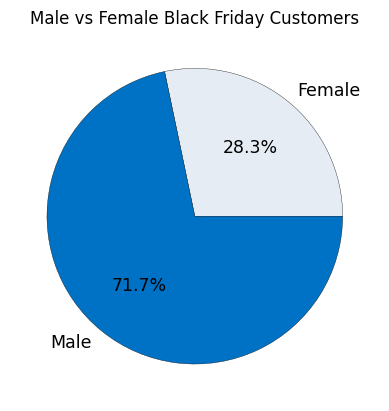

In [1296]:
kc_pie_chart(num_mf, mf, "Male vs Female Black Friday Customers")
plt.savefig('results/male_fem_pie.png')

In [1297]:
user_data_items['num_items'].sum()

550068

In [1298]:
bf_sales['purchase'].describe()

count   550068
mean      9264
std       5023
min         12
25%       5823
50%       8047
75%      12054
max      23961
Name: purchase, dtype: float64

I want to create a data frame for users and their sales, and then group by the user to get the total amount of purchases per user ID

In [1299]:
user_sales = bf_sales[['user_id', 'purchase']]
user_sales

,user_id,purchase
0,1000001,8370
1,1000001,15200
2,1000001,1422
3,1000001,1057
4,1000002,7969
...,...,...
550063,1006033,368
550064,1006035,371
550065,1006036,137
550066,1006038,365


In [1300]:
user_sales_grouped = user_sales.groupby('user_id')['purchase'].sum().reset_index()
user_sales_grouped

,user_id,purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000004,206468
4,1000005,821001
...,...,...
5886,1006036,4116058
5887,1006037,1119538
5888,1006038,90034
5889,1006039,590319


In [1301]:
# After summing, verifying that the total sales remain the same as before
print(user_sales_grouped['purchase'].sum())
print(sales_total)


5095812742
5095812742


In [1302]:
# merge user_sales_grouped with user_data_items
user_data_items = pd.merge(user_data_items, user_sales_grouped)


## Creating item_data
A separate data frame was made for the item data. After removing duplicates, it was found that there are 3631 unique items in the dataset, which are split into 20 categories.

In [1303]:
bf_sales.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [1304]:
bf_sales.shape

(550068, 10)

In [1305]:
item_data = bf_sales[['product_id', 'product_category']].drop_duplicates().reset_index()
item_data = item_data.drop('index', axis=1)
unique_values = item_data['product_category'].unique()
print('Number of Product Categories: ', len(unique_values))
item_data

Number of Product Categories:  20


,product_id,product_category
0,P00069042,3
1,P00248942,1
2,P00087842,12
3,P00085442,12
4,P00285442,8
...,...,...
3626,P00375436,20
3627,P00372445,20
3628,P00370293,19
3629,P00371644,20


## Distribution of Spending

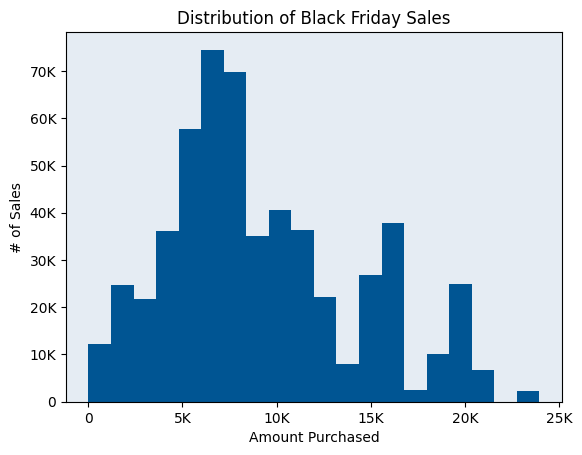

In [1306]:
ax = plt.subplot()
plt.hist(bf_sales['purchase'], bins=20, color=kcblue)
plt.title('Distribution of Black Friday Sales')
plt.xlabel('Amount Purchased')
plt.ylabel('# of Sales')

ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.set_facecolor(kcbgcolor)

plt.savefig('results/distribution_sales_hist.png')



## Sales by Age Bracket

In [1307]:
sales_age = user_data_items[['age', 'purchase']]

In [1308]:
sales_age_grouped = sales_age.groupby('age')['purchase'].sum().reset_index()
print(sales_age_grouped['purchase'].sum())
sales_age_grouped

5095812742


,age,purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


In [1309]:
n_ages = len(ages)
x = range(n_ages)
print(x)

range(0, 7)


In [1310]:
y = sales_age_grouped['purchase']
y

0     134913183
1     913848675
2    2031770578
3    1026569884
4     420843403
5     367099644
6     200767375
Name: purchase, dtype: int64

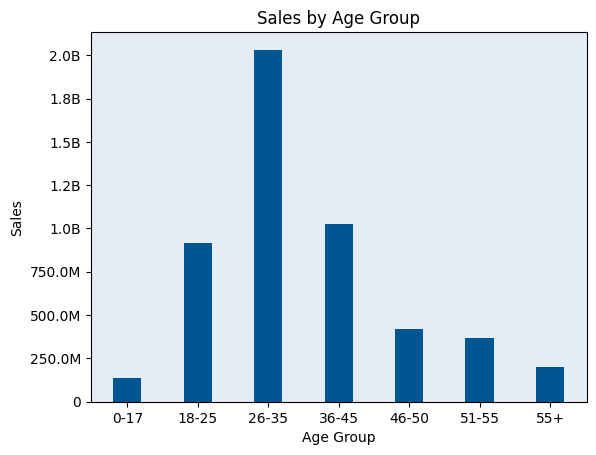

In [1311]:
bar_chart(x, y, ages, "Sales by Age Group", "Age Group", "Sales")
plt.savefig('results/sales_by_age_group_bar.png')

## Exploring Gender and Sales

In [1312]:
user_data_items.head()


,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,num_items,purchase
0,1000001,F,0-17,10,A,2,0,35,334093
1,1000002,M,55+,16,C,4+,0,77,810472
2,1000003,M,26-35,15,A,3,0,29,341635
3,1000004,M,46-50,7,B,2,1,14,206468
4,1000005,M,26-35,20,A,1,1,106,821001


In [1313]:
user_data_items['purchase'].describe()

count       5891
mean      865017
std       943645
min        46681
25%       237678
50%       521213
75%      1119250
max     10536909
Name: purchase, dtype: float64

In [1314]:
user_data_items['purchase'].sum()

5095812742

In [1315]:
bf_sales['purchase'].sum()

5095812742

In [1316]:
user_gender_sales = user_data_items[['user_id', 'gender', 'age', 'num_items', 'purchase']]
user_gender_sales


,user_id,gender,age,num_items,purchase
0,1000001,F,0-17,35,334093
1,1000002,M,55+,77,810472
2,1000003,M,26-35,29,341635
3,1000004,M,46-50,14,206468
4,1000005,M,26-35,106,821001
...,...,...,...,...,...
5886,1004588,F,26-35,20,140990
5887,1004871,M,18-25,12,108545
5888,1004113,M,36-45,20,213550
5889,1005391,M,26-35,7,60182


In [1317]:
male_sales = user_gender_sales[user_gender_sales['gender'] == 'M' ]
fem_sales  = user_gender_sales[user_gender_sales['gender'] == 'F' ]

fem_sales.head()

,user_id,gender,age,num_items,purchase
0,1000001,F,0-17,35,334093
5,1000006,F,51-55,47,379930
9,1000010,F,36-45,223,2169510
10,1000011,F,26-35,70,557023
15,1000016,F,36-45,22,150490


In [1318]:
fem_sales['purchase'].describe()

count      1666
mean     712024
std      807371
min       46681
25%      202655
50%      407263
75%      873772
max     6187094
Name: purchase, dtype: float64

In [1319]:
male_sales['purchase'].describe()

count       4225
mean      925344
std       985830
min        49288
25%       258589
50%       578540
75%      1215237
max     10536909
Name: purchase, dtype: float64

## Male Spending Distribution

In [1320]:
male_sales.describe()

,user_id,num_items,purchase
count,4225,4225,4225
mean,1002985,98,925344
std,1719,111,985830
min,1000002,6,49288
25%,1001507,27,258589
50%,1002987,58,578540
75%,1004439,123,1215237
max,1006040,1026,10536909


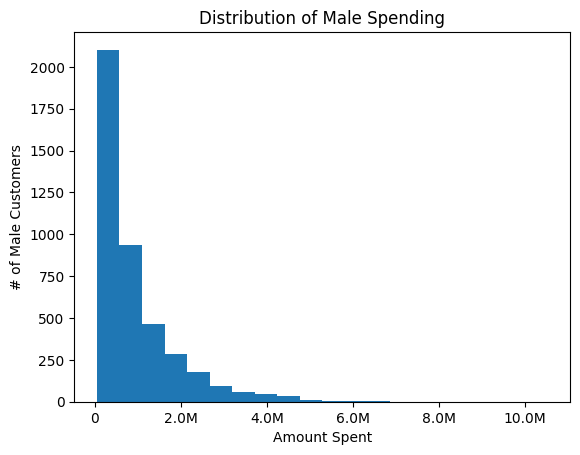

<Figure size 640x480 with 0 Axes>

In [1321]:
ax = plt.subplot()
plt.hist(male_sales['purchase'], bins=20);
plt.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(format_number)
plt.title('Distribution of Male Spending')
plt.ylabel('# of Male Customers')
plt.xlabel('Amount Spent')
plt.show()

plt.savefig('results/dist_sales_male_hist1')

## Female Spending Distribution

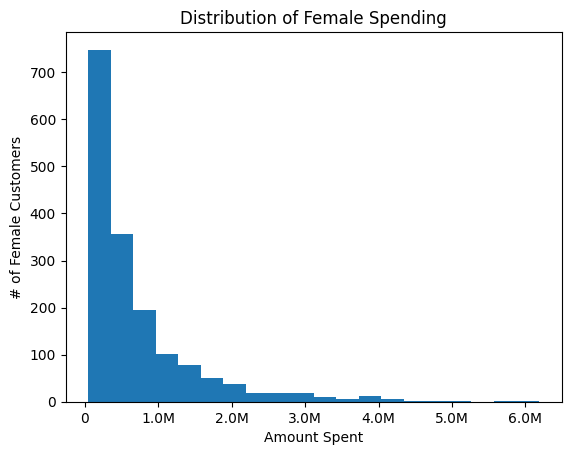

In [1322]:
ax = plt.subplot()
plt.hist(fem_sales['purchase'], bins=20)
plt.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(format_number)
plt.title('Distribution of Female Spending')
plt.ylabel('# of Female Customers')
plt.xlabel('Amount Spent')
plt.show()

In [1323]:
# Verifying numbers

print('Sales Total from bf_sales: ' , sales_total)
print('Sum of Female and Male Spending: ' , fem_sales['purchase'].sum() + male_sales['purchase'].sum())



Sales Total from bf_sales:  5095812742
Sum of Female and Male Spending:  5095812742


In [1324]:
fem_age_sales = fem_sales[['gender', 'age', 'purchase']]
print(fem_age_sales.shape)
print(fem_age_sales['purchase'].sum())
fem_age_sales

male_age_sales = male_sales[['gender', 'age', 'purchase']]
male_age_sales

(1666, 3)
1186232642


,gender,age,purchase
1,M,55+,810472
2,M,26-35,341635
3,M,46-50,206468
4,M,26-35,821001
6,M,36-45,234668
...,...,...,...
5884,M,36-45,94838
5887,M,18-25,108545
5888,M,36-45,213550
5889,M,26-35,60182


In [1325]:
fem_age_sales_grouped = fem_age_sales.groupby('age')['purchase'].sum().reset_index()
fem_age_sales_grouped.insert(0, 'gender', 'F')
print(fem_age_sales_grouped)

male_age_sales_grouped = male_age_sales.groupby('age')['purchase'].sum().reset_index()
male_age_sales_grouped.insert(0, 'gender', 'M')
print('\n', male_age_sales_grouped)


  gender    age   purchase
0      F   0-17   42385978
1      F  18-25  205475842
2      F  26-35  442976233
3      F  36-45  243438963
4      F  46-50  116706864
5      F  51-55   89465997
6      F    55+   45782765

   gender    age    purchase
0      M   0-17    92527205
1      M  18-25   708372833
2      M  26-35  1588794345
3      M  36-45   783130921
4      M  46-50   304136539
5      M  51-55   277633647
6      M    55+   154984610


In [1326]:
ages

0      0-17
70    18-25
5     26-35
18    36-45
6     46-50
14    51-55
4       55+
Name: age, dtype: object

In [1327]:
x = range(len(ages))
print(x)

range(0, 7)


In [1328]:
fem_y = fem_age_sales_grouped['purchase']
fem_y

0     42385978
1    205475842
2    442976233
3    243438963
4    116706864
5     89465997
6     45782765
Name: purchase, dtype: int64

## Fem Spending by Age


In [1329]:
fem_y

0     42385978
1    205475842
2    442976233
3    243438963
4    116706864
5     89465997
6     45782765
Name: purchase, dtype: int64

In [1330]:
x

range(0, 7)

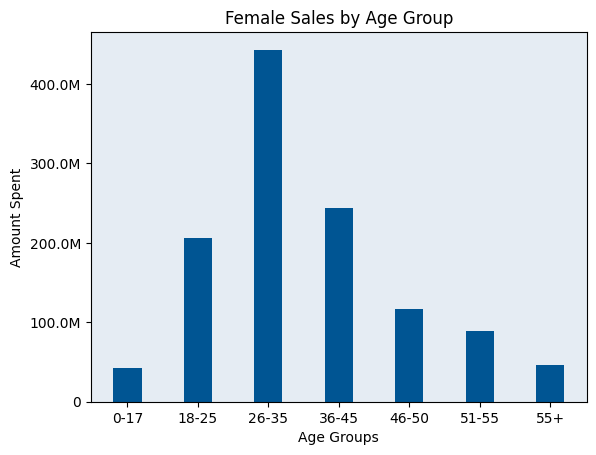

In [1331]:
bar_chart(x, fem_y, ages, "Female Sales by Age Group", "Age Groups", "Amount Spent")

plt.savefig('results/sales_age_group_fem_bar.png')


In [1332]:
male_y = male_age_sales_grouped['purchase']
male_y

0      92527205
1     708372833
2    1588794345
3     783130921
4     304136539
5     277633647
6     154984610
Name: purchase, dtype: int64

## Male Spending by Age

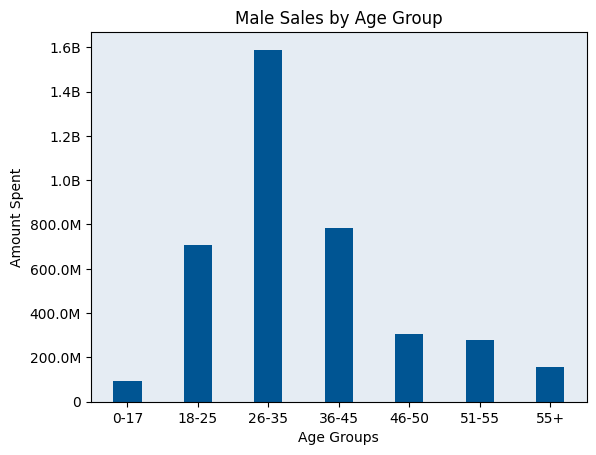

In [1333]:
bar_chart(x, male_y, ages, "Male Sales by Age Group", "Age Groups", "Amount Spent")

plt.savefig('results/sales_age_group_male_bar.png')

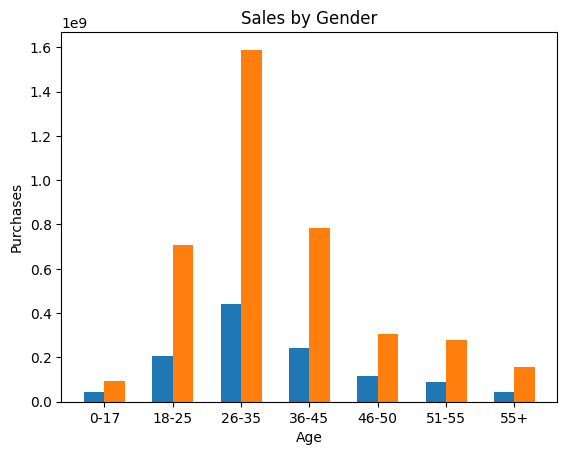

In [1334]:
ind = np.arange(len(ages))
width = 0.3

pd.options.display.float_format = '{:.2f}'.format

plt.bar(ind, fem_y, width, label='Females')
plt.bar(ind + width, male_y, width, label='Males')
plt.title('Sales by Gender')
plt.ylabel('Purchases')
plt.xlabel('Age')
# plt.yscale('log')
plt.xticks(ind + width / 2,  ages);

In [1335]:
# To do next: plot both of these with each gender on either side of the x axis 

To do next: idk fix this mess lol (aka stacked bar graph)

**https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar**

In [1336]:
fem_y

0     42385978
1    205475842
2    442976233
3    243438963
4    116706864
5     89465997
6     45782765
Name: purchase, dtype: int64

# Spending by Gender and Age Group

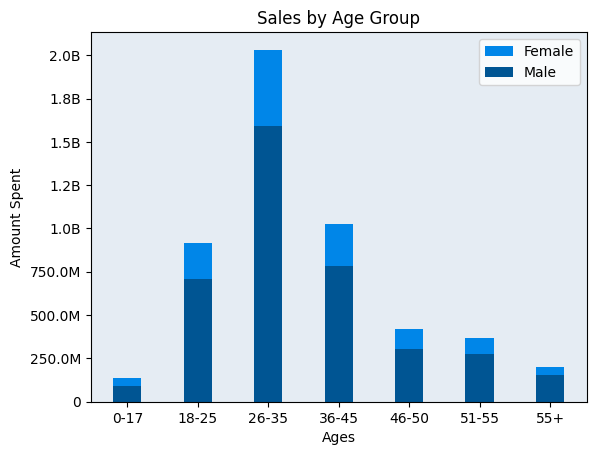

In [1337]:
stacked_bar(x, fem_y, male_y, ages, "Female", "Male", "Sales by Age Group", "Ages", "Amount Spent" ) 
plt.savefig('results/sales_age_group_bar_stacked.png')

In [1338]:
print(fem_y)
print(male_y)

0     42385978
1    205475842
2    442976233
3    243438963
4    116706864
5     89465997
6     45782765
Name: purchase, dtype: int64
0      92527205
1     708372833
2    1588794345
3     783130921
4     304136539
5     277633647
6     154984610
Name: purchase, dtype: int64


In [1339]:
male_age_sales_grouped


,gender,age,purchase
0,M,0-17,92527205
1,M,18-25,708372833
2,M,26-35,1588794345
3,M,36-45,783130921
4,M,46-50,304136539
5,M,51-55,277633647
6,M,55+,154984610


In [1340]:
male_age_sales_grouped

male_total_purchase = male_age_sales_grouped.groupby('gender')['purchase'].sum().reset_index()
male_total_purchase


,gender,purchase
0,M,3909580100


In [1341]:
fem_age_sales_grouped

fem_total_purchase = fem_age_sales_grouped.groupby('gender')['purchase'].sum().reset_index()

fem_total_purchase

,gender,purchase
0,F,1186232642


In [1342]:
# https://www.geeksforgeeks.org/merge-two-dataframes-with-same-column-names/

gen_tot_purchase = pd.concat([fem_total_purchase, male_total_purchase], axis=0)
gen_tot_purchase

,gender,purchase
0,F,1186232642
0,M,3909580100


In [1343]:
genders = gen_tot_purchase['gender']
genders

0    F
0    M
Name: gender, dtype: object

# Spending by Gender Pie

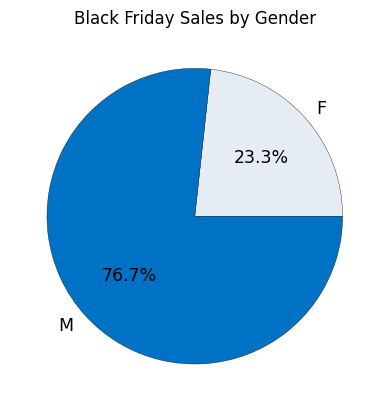

In [1344]:
kc_pie_chart(gen_tot_purchase['purchase'], genders, "Black Friday Sales by Gender")
plt.savefig('results/sales_gender_pie.png')

In [1345]:
bf_sales['purchase'].describe()

count   550068.00
mean      9263.97
std       5023.07
min         12.00
25%       5823.00
50%       8047.00
75%      12054.00
max      23961.00
Name: purchase, dtype: float64

In [1346]:
print("Male Sales Sample Stats")
print(male_y.describe(), '\n')

print("Female Sales Sample Stats")
print(fem_y.describe())


Male Sales Sample Stats
count            7.00
mean     558511442.86
std      525669311.03
min       92527205.00
25%      216309128.50
50%      304136539.00
75%      745751877.00
max     1588794345.00
Name: purchase, dtype: float64 

Female Sales Sample Stats
count           7.00
mean    169461806.00
std     142715893.14
min      42385978.00
25%      67624381.00
50%     116706864.00
75%     224457402.50
max     442976233.00
Name: purchase, dtype: float64


## Spending by Marital Status

In [1347]:
user_data_items.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,num_items,purchase
0,1000001,F,0-17,10,A,2,0,35,334093
1,1000002,M,55+,16,C,4+,0,77,810472
2,1000003,M,26-35,15,A,3,0,29,341635
3,1000004,M,46-50,7,B,2,1,14,206468
4,1000005,M,26-35,20,A,1,1,106,821001


In [1348]:
married_users = user_data_items[user_data_items['marital_status'] == 1]
unmarried_users = user_data_items[user_data_items['marital_status'] == 0]

Now to get the sums of spending by married vs unmarried

In [1349]:
# male_total_purchase = male_age_sales_grouped.groupby('gender')['purchase'].sum().reset_index()

married_total_pur = married_users.groupby('marital_status')['purchase'].sum().reset_index()
married_total_pur

,marital_status,purchase
0,1,2086885295


In [1350]:
unmarried_total_pur = unmarried_users.groupby('marital_status')['purchase'].sum().reset_index()
unmarried_total_pur

,marital_status,purchase
0,0,3008927447


In [1351]:
marital_total_pur = pd.concat([married_total_pur, unmarried_total_pur], axis=0)
marital_total_pur['marital_status'].replace(0, 'Unmarried', inplace=True)
marital_total_pur['marital_status'].replace(1, 'Married', inplace=True)

status = marital_total_pur['marital_status']
marital_total_pur

,marital_status,purchase
0,Married,2086885295
0,Unmarried,3008927447


In [1352]:
users_marital_stat = user_data_items['marital_status'].value_counts().reset_index()

users_marital_stat['marital_status'].replace({0: 'Unmarried'}, inplace=True)
users_marital_stat['marital_status'].replace({1 : 'Married'}, inplace=True)

users_marital_stat = users_marital_stat.sort_values(by='marital_status')

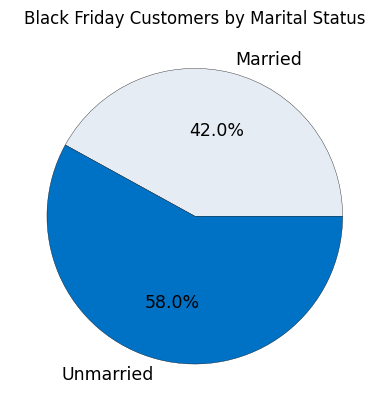

In [1353]:
kc_pie_chart(users_marital_stat['count'], users_marital_stat['marital_status'],
             "Black Friday Customers by Marital Status")

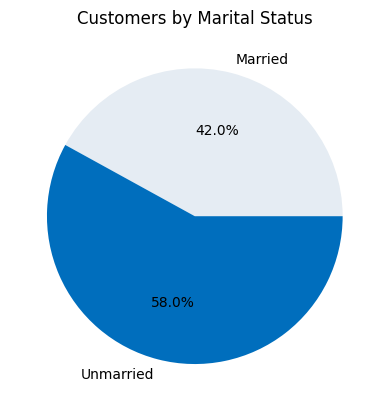

In [1354]:

plt.pie(users_marital_stat['count'], labels=users_marital_stat['marital_status'],
        autopct='%1.1f%%',
        colors=(kcbgcolor, kcblue2 ));

plt.title('Customers by Marital Status') 

plt.savefig('results/marital_users_pie.png')

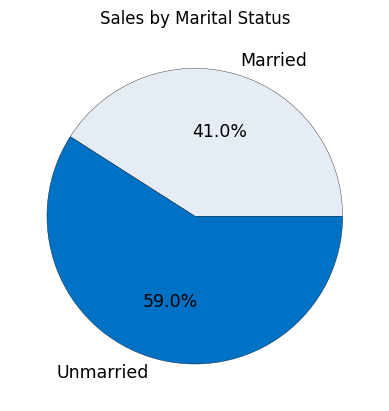

In [1355]:
kc_pie_chart(marital_total_pur['purchase'], status, "Sales by Marital Status")

plt.savefig('results/sales_marital_pie.png') 

## Sales by City

In [1356]:
user_data_items

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,num_items,purchase
0,1000001,F,0-17,10,A,2,0,35,334093
1,1000002,M,55+,16,C,4+,0,77,810472
2,1000003,M,26-35,15,A,3,0,29,341635
3,1000004,M,46-50,7,B,2,1,14,206468
4,1000005,M,26-35,20,A,1,1,106,821001
...,...,...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0,20,140990
5887,1004871,M,18-25,12,C,2,0,12,108545
5888,1004113,M,36-45,17,C,3,0,20,213550
5889,1005391,M,26-35,7,A,0,0,7,60182


In [1357]:
unmarried_total_pur = unmarried_users.groupby('marital_status')['purchase'].sum().reset_index()

city_pur = user_data_items[['city_category', 'purchase']].groupby('city_category')['purchase'].sum().reset_index()
city_pur

cities = city_pur['city_category']
city_len = len(cities)



In [1358]:
city_pur

,city_category,purchase
0,A,1316471661
1,B,2115533605
2,C,1663807476


In [1359]:
fem_user_data_items = user_data_items[user_data_items['gender'] == 'F']
fem_user_data_items

male_user_data_items = user_data_items[user_data_items['gender'] == 'M']
male_user_data_items.shape

(4225, 9)

In [1360]:
fem_city_sales = fem_user_data_items.groupby('city_category')['purchase'].sum().reset_index()
fem_city_sales['purchase'].sum()

1186232642

In [1361]:
male_city_sales = male_user_data_items.groupby('city_category')['purchase'].sum().reset_index()
male_city_sales['purchase'].sum()
male_city_sales

,city_category,purchase
0,A,1010141746
1,B,1621916597
2,C,1277521757


In [1362]:
x

range(0, 7)

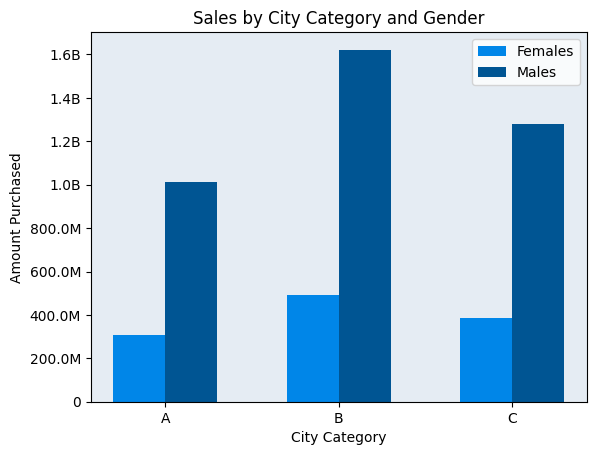

In [1363]:
side_bar(fem_city_sales['purchase'], male_city_sales['purchase'], "Females", "Males",
         "Sales by City Category and Gender", "Amount Purchased", "City Category", cities)

plt.savefig('results/sales_by_city_gender_bar.png')

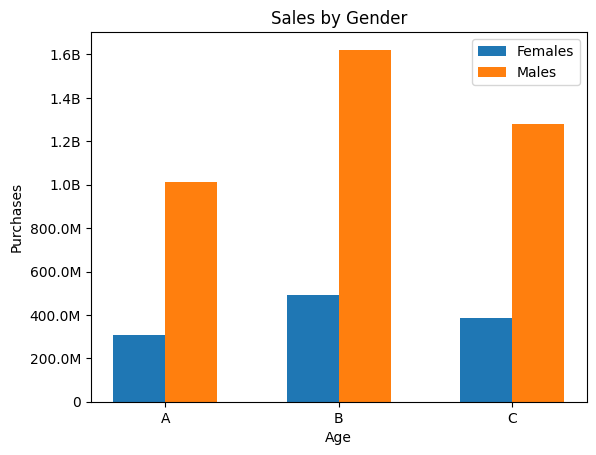

In [1364]:
ind = np.arange(len(cities))
width = 0.3
ax = plt.subplot()
pd.options.display.float_format = '{:.2f}'.format

plt.bar(ind, fem_city_sales['purchase'], width, label='Females')
plt.bar(ind + width, male_city_sales['purchase'], width, label='Males')
plt.title('Sales by Gender')
plt.ylabel('Purchases')
plt.xlabel('Age')
# plt.yscale('log')

plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(format_number)

plt.legend()
plt.xticks(ind + width / 2,  cities);

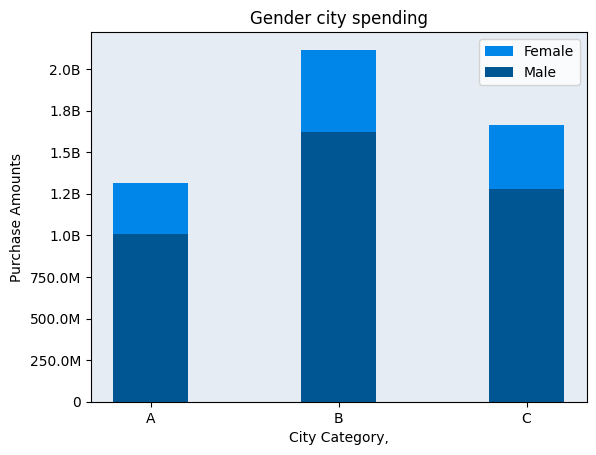

In [1365]:
stacked_bar(range(len(cities)), fem_city_sales['purchase'], male_city_sales['purchase'],
            cities, 'Female', 'Male', "Gender city spending", 'City Category,', "Purchase Amounts")

plt.savefig('results/sales_by_city_genders_bar.png')

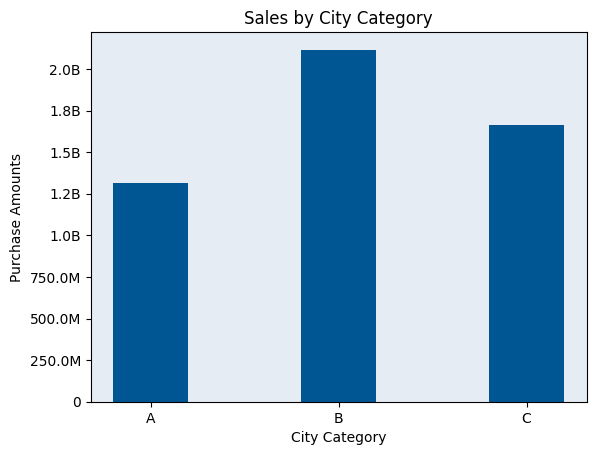

In [1366]:
x = range(city_len)
bar_chart(x, city_pur['purchase'], cities, "Sales by City Category", "City Category",
          "Purchase Amounts")

plt.savefig('results/sales_by_city_bar.png')

In [1367]:
bf_sales['purchase'].describe()

count   550068.00
mean      9263.97
std       5023.07
min         12.00
25%       5823.00
50%       8047.00
75%      12054.00
max      23961.00
Name: purchase, dtype: float64

In [1368]:
bf_sales['purchase'].sum()

5095812742

## Sales by Occupation

In [1369]:
user_data_items.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,num_items,purchase
0,1000001,F,0-17,10,A,2,0,35,334093
1,1000002,M,55+,16,C,4+,0,77,810472
2,1000003,M,26-35,15,A,3,0,29,341635
3,1000004,M,46-50,7,B,2,1,14,206468
4,1000005,M,26-35,20,A,1,1,106,821001


In [1370]:
occupation_sales = user_data_items[['user_id', 'gender', 'age', 'occupation', 'purchase']]
occupation_sales.head()

,user_id,gender,age,occupation,purchase
0,1000001,F,0-17,10,334093
1,1000002,M,55+,16,810472
2,1000003,M,26-35,15,341635
3,1000004,M,46-50,7,206468
4,1000005,M,26-35,20,821001


In [1371]:
gender_occup = occupation_sales[['gender', 'occupation']]

fem_occup = gender_occup[gender_occup['gender'] == 'F'].reset_index()
male_occup = gender_occup[gender_occup['gender'] == 'M'].reset_index()



fem_occup = fem_occup.drop('index', axis = 1)
male_occup = male_occup.drop('index', axis=1)



Both male and female occupations

In [1372]:
gender_occup

,gender,occupation
0,F,10
1,M,16
2,M,15
3,M,7
4,M,20
...,...,...
5886,F,4
5887,M,12
5888,M,17
5889,M,7


In [1373]:
gender_occup

,gender,occupation
0,F,10
1,M,16
2,M,15
3,M,7
4,M,20
...,...,...
5886,F,4
5887,M,12
5888,M,17
5889,M,7


In [1374]:
gender_occup_grp = gender_occup.groupby('occupation', as_index=False).count()
gender_occup_grp.columns = ['occupation', 'num_users']
gender_occup_grp.sort_values(by="num_users")

gender_occup_grp_sort = gender_occup_grp.sort_values(by="num_users")

In [1375]:
gender_occup_grp

,occupation,num_users
0,0,688
1,1,517
2,2,256
3,3,170
4,4,740
5,5,111
6,6,228
7,7,669
8,8,17
9,9,88


In [1376]:
gender_occup_grp_sort

,occupation,num_users
8,8,17
18,18,67
19,19,71
9,9,88
5,5,111
11,11,128
15,15,140
13,13,140
3,3,170
10,10,192


Bar chart for occupations by users:



In [1377]:
gender_occup_grp_sort

,occupation,num_users
8,8,17
18,18,67
19,19,71
9,9,88
5,5,111
11,11,128
15,15,140
13,13,140
3,3,170
10,10,192


In [1378]:
all_users_occup_group = (
    user_data_items.groupby('occupation')['user_id']
    .count().reset_index()
    .sort_values(by='user_id', ascending=False)
    # .columns = ['occupation', 'num_users']
)
all_users_occup_group.columns = ['occupation', 'num_users']
all_users_occup_group

,occupation,num_users
4,4,740
0,0,688
7,7,669
1,1,517
17,17,491
12,12,376
14,14,294
20,20,273
2,2,256
16,16,235


In [1379]:
occupations = gender_occup_grp_sort['occupation']

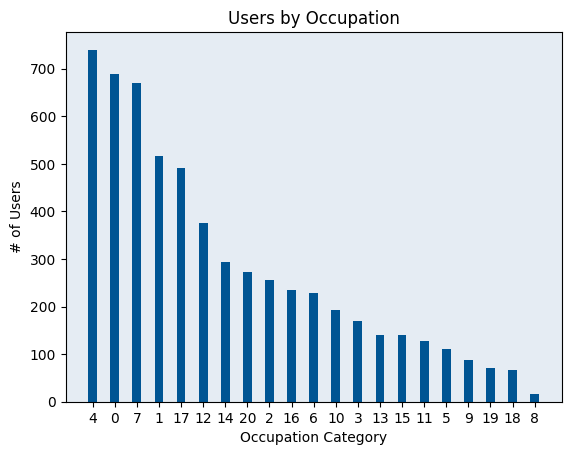

In [1380]:
# TO DO: arrange by highest occupation to lowest
x = range(len(gender_occup_grp))
bar_chart(range(len(all_users_occup_group)), all_users_occup_group['num_users'], 
          all_users_occup_group['occupation'], "Users by Occupation", "Occupation Category", "# of Users" )

plt.savefig('results/occup_all_users_bar.png')

In [1381]:
# Female Users by Occupation

fem_users_occu = (
    user_data_items[user_data_items['gender'] == 'F']
    .groupby('occupation')['user_id']
    .count()
    .reset_index()
    .sort_values(by='user_id', ascending=False)    
)

fem_users_occu.columns = ['occupation', 'num_users']


# Male users by Occupation

male_users_occu = (
    user_data_items[user_data_items['gender'] == 'M']
    .groupby('occupation')['user_id']
    .count()
    .reset_index()
    .sort_values(by='user_id', ascending=False)    
)

male_users_occu.columns = ['occupation', 'num_users']


In [1382]:
all_sales_occup_group = (
    user_data_items.groupby('occupation')['purchase']
    .sum()
    .reset_index()
    .sort_values(by='purchase', ascending=False)
)

all_sales_occup_group

,occupation,purchase
4,4,666244484
0,0,635406958
7,7,557371587
1,1,424614144
17,17,393281453
12,12,305449446
20,20,296570442
14,14,259454692
16,16,238346955
2,2,238028583


In [1383]:
occupations = male_users_occu['occupation'].sort_values()
occupations

all_sales_occup_group

,occupation,purchase
4,4,666244484
0,0,635406958
7,7,557371587
1,1,424614144
17,17,393281453
12,12,305449446
20,20,296570442
14,14,259454692
16,16,238346955
2,2,238028583


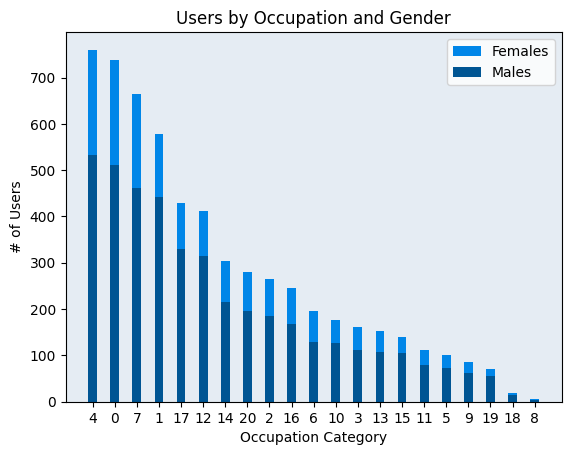

In [1384]:
stacked_bar(range(len(fem_users_occu)), fem_users_occu['num_users'],
            male_users_occu['num_users'], all_users_occup_group['occupation'],
             'Females',  'Males', 'Users by Occupation and Gender', 'Occupation Category',
             '# of Users')

In [1385]:
# Female spending by occupation (user user data items)

user_data_items
fem_sales_occup = user_data_items[user_data_items['gender'] == 'F'][['gender', 'occupation', 'purchase']]
fem_sales_occup

,gender,occupation,purchase
0,F,10,334093
5,F,9,379930
9,F,1,2169510
10,F,1,557023
15,F,0,150490
...,...,...,...
5879,F,2,139887
5880,F,2,86847
5882,F,1,102328
5885,F,9,276411


In [1386]:
fem_sales_occup['purchase'].sum()

1186232642

In [1387]:
fem_sales_occup_group = fem_sales_occup.groupby('occupation')['purchase'].sum().reset_index()
fem_sales_occup_group = fem_sales_occup_group.sort_values(by='purchase', ascending=False)

In [1388]:
# same code as above but condensed 

male_sales_occup_group = (
    user_data_items[user_data_items['gender'] == 'M']
    .groupby('occupation')['purchase']
    .sum()
    .reset_index()
    .sort_values(by='purchase', ascending=False)
)

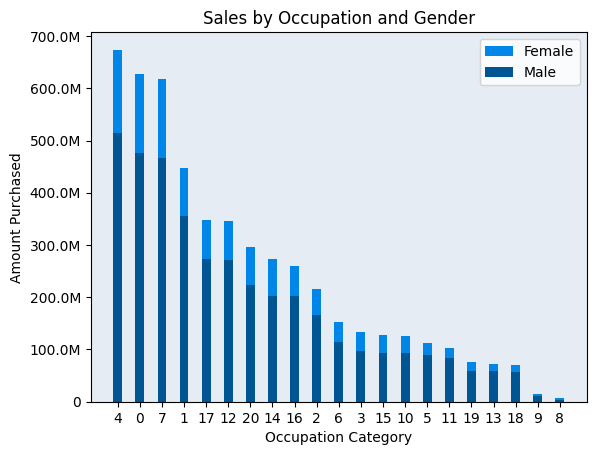

In [1389]:
stacked_bar(range(len(occupations)), fem_sales_occup_group['purchase'], male_sales_occup_group['purchase'],
            all_sales_occup_group['occupation'], 'Female', 'Male', 'Sales by Occupation and Gender', 
            'Occupation Category', 'Amount Purchased')

plt.savefig('results/occup_all_sales_gender.png')

In [1390]:
fem_sales_occup_group

,occupation,purchase
0,0,159883833
1,1,152806726
4,4,152264321
7,7,91177610
6,6,74079792
20,20,73428976
2,2,72569470
3,3,71707639
14,14,58010060
9,9,50206487


In [1391]:
test = (
    user_data_items[user_data_items['gender'] == 'F']
    .groupby('occupation')['purchase']
    .sum()
    .reset_index()
    .sort_values(by='purchase', ascending=False)
)
test

,occupation,purchase
0,0,159883833
1,1,152806726
4,4,152264321
7,7,91177610
6,6,74079792
20,20,73428976
2,2,72569470
3,3,71707639
14,14,58010060
9,9,50206487


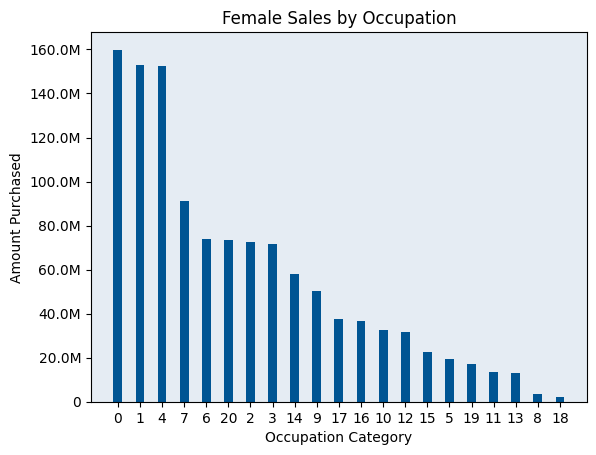

In [1392]:
# bar_chart(range(len(fem_sales_occup)), fem_sales_occup['gender'], fem_sales_occup['occupation'],
 #         "Female Sales by Occupation", 'Occupation Category', "Purchase Amount") 

bar_chart(range(len(fem_sales_occup_group)), fem_sales_occup_group['purchase'],
          fem_sales_occup_group['occupation'], "Female Sales by Occupation", 
          'Occupation Category', 'Amount Purchased')

plt.savefig('results/occup_fem_sales.png')


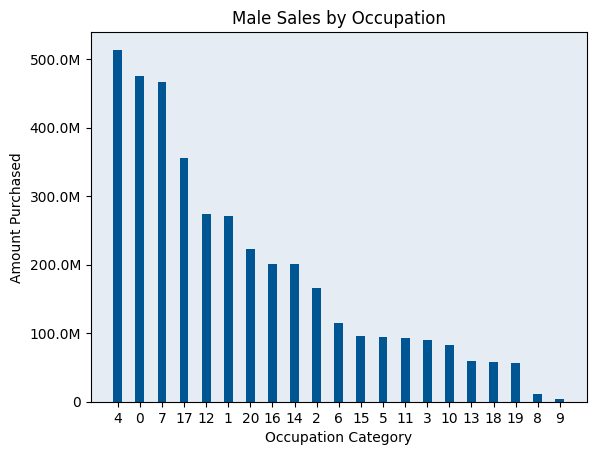

In [1393]:
bar_chart(range(len(male_sales_occup_group)), male_sales_occup_group['purchase'],
          male_sales_occup_group['occupation'], "Male Sales by Occupation", 
          'Occupation Category', 'Amount Purchased')

plt.savefig('results/occup_male_sales.png')

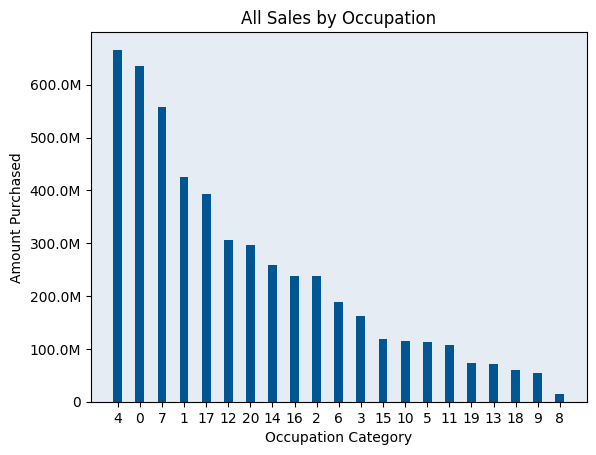

In [1394]:
bar_chart(range(len(all_sales_occup_group)), all_sales_occup_group['purchase'],
          all_sales_occup_group['occupation'], "All Sales by Occupation", 
          'Occupation Category', 'Amount Purchased') 

plt.savefig('results/occup_all_sales.png')

In [1395]:
# verifying that occupation 8 truly does make up the most amount of users and 
# the least amount of sales
user_data_items[user_data_items['occupation'] == 8].shape



(17, 9)

In [1396]:
bf_sales

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [1397]:
gender_occup_grp


,occupation,num_users
0,0,688
1,1,517
2,2,256
3,3,170
4,4,740
5,5,111
6,6,228
7,7,669
8,8,17
9,9,88


In [1398]:
item_data.head()
item_data.shape

(3631, 2)

In [1399]:
bf_sales

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [1400]:
all_sold_products = bf_sales[['product_id', 'product_category']]


# TO DO: What's best way to show this data? Top 5? Bottom 5? (how do when bottom 5 only sold 1?)
# Can we visualize the most popular products by male/female

In [1401]:
popular_products = all_sold_products.groupby('product_id', as_index=False).count()
popular_products.columns = ['product_id', 'num_sold']
popular_products_sort = popular_products.sort_values(by='num_sold').reset_index()
popular_products_sort = popular_products_sort.drop('index', axis=1)
popular_products_sort


,product_id,num_sold
0,P00306942,1
1,P00309642,1
2,P00309042,1
3,P00348142,1
4,P00308042,1
...,...,...
3626,P00057642,1470
3627,P00112142,1562
3628,P00110742,1612
3629,P00025442,1615


In [1402]:
popular_products_sort = pd.merge(popular_products_sort, item_data[['product_id', 'product_category']])

In [1403]:
popular_products_sort.head(20)

,product_id,num_sold,product_category
0,P00306942,1,11
1,P00309642,1,5
2,P00309042,1,12
3,P00348142,1,5
4,P00308042,1,10
5,P00307242,1,7
6,P00012342,1,8
7,P00307042,1,8
8,P00306542,1,5
9,P00305542,1,11


In [1404]:
bf_sales['product_category'].value_counts()

product_category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [1405]:
popular_products_sort['num_sold'].sum()

550068

In [1406]:
popular_products_sort

,product_id,num_sold,product_category
0,P00306942,1,11
1,P00309642,1,5
2,P00309042,1,12
3,P00348142,1,5
4,P00308042,1,10
...,...,...,...
3626,P00057642,1470,1
3627,P00112142,1562,1
3628,P00110742,1612,1
3629,P00025442,1615,1


In [1407]:
bf_sales['purchase'].describe()

count   550068.00
mean      9263.97
std       5023.07
min         12.00
25%       5823.00
50%       8047.00
75%      12054.00
max      23961.00
Name: purchase, dtype: float64

In [1408]:
bf_sales[['user_id', 'product_id', 'purchase']].drop_duplicates()

,user_id,product_id,purchase
0,1000001,P00069042,8370
1,1000001,P00248942,15200
2,1000001,P00087842,1422
3,1000001,P00085442,1057
4,1000002,P00285442,7969
...,...,...,...
550063,1006033,P00372445,368
550064,1006035,P00375436,371
550065,1006036,P00375436,137
550066,1006038,P00375436,365


In [1409]:
user_data_items['purchase'].describe()

count       5891.00
mean      865016.59
std       943644.54
min        46681.00
25%       237678.00
50%       521213.00
75%      1119249.50
max     10536909.00
Name: purchase, dtype: float64

In [1410]:
user_data_items['num_items'].describe()

count   5891.00
mean      93.37
std      107.19
min        6.00
25%       26.00
50%       54.00
75%      117.00
max     1026.00
Name: num_items, dtype: float64

In [1411]:
bf_sales[bf_sales['product_id'] == 'P00069042']

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
825,1000149,P00069042,M,26-35,1,B,2,1,3,10715
3314,1000541,P00069042,F,18-25,4,C,3,0,3,11037
4224,1000698,P00069042,M,18-25,4,A,1,0,3,8009
5864,1000951,P00069042,M,46-50,2,B,4+,1,3,13346
...,...,...,...,...,...,...,...,...,...,...
539484,1005061,P00069042,F,18-25,19,C,2,1,3,13483
540849,1005284,P00069042,M,26-35,16,C,1,0,3,10895
543419,1005667,P00069042,M,36-45,7,B,1,1,3,11047
544454,1005812,P00069042,F,26-35,7,A,1,1,3,13557


In [1412]:
bf_sales['purchase'].sum()


5095812742

In [1413]:
popular_products['num_sold'].describe()


count   3631.00
mean     151.49
std      212.85
min        1.00
25%       19.50
50%       71.00
75%      194.00
max     1880.00
Name: num_sold, dtype: float64

In [1414]:
user_data_items['num_items'].describe()

count   5891.00
mean      93.37
std      107.19
min        6.00
25%       26.00
50%       54.00
75%      117.00
max     1026.00
Name: num_items, dtype: float64

In [1415]:
popular_products.describe()

,num_sold
count,3631.00
mean,151.49
std,212.85
min,1.00
25%,19.50
50%,71.00
75%,194.00
max,1880.00


In [1416]:
bf_sales['purchase'].describe() 

count   550068.00
mean      9263.97
std       5023.07
min         12.00
25%       5823.00
50%       8047.00
75%      12054.00
max      23961.00
Name: purchase, dtype: float64

In [1417]:
user_data_items[['num_items', 'purchase']].describe()

,num_items,purchase
count,5891.00,5891.00
mean,93.37,865016.59
std,107.19,943644.54
min,6.00,46681.00
25%,26.00,237678.00
50%,54.00,521213.00
75%,117.00,1119249.50
max,1026.00,10536909.00


In [1418]:
user_data_items[['num_items', 'purchase']]

,num_items,purchase
0,35,334093
1,77,810472
2,29,341635
3,14,206468
4,106,821001
...,...,...
5886,20,140990
5887,12,108545
5888,20,213550
5889,7,60182


In [1419]:
user_data.shape

(5891, 7)

In [1420]:
top_five_products = popular_products_sort.tail(5)
top_five_products = top_five_products.sort_values(ascending=False, by='num_sold')
top_five_products

,product_id,num_sold,product_category
3630,P00265242,1880,5
3629,P00025442,1615,1
3628,P00110742,1612,1
3627,P00112142,1562,1
3626,P00057642,1470,1


In [1421]:
top_five_products['num_sold']

3630    1880
3629    1615
3628    1612
3627    1562
3626    1470
Name: num_sold, dtype: int64

In [1422]:
top_five_products

,product_id,num_sold,product_category
3630,P00265242,1880,5
3629,P00025442,1615,1
3628,P00110742,1612,1
3627,P00112142,1562,1
3626,P00057642,1470,1


In [1423]:
top_five_products.describe()

,num_sold,product_category
count,5.00,5.00
mean,1627.80,1.80
std,152.68,1.79
min,1470.00,1.00
25%,1562.00,1.00
50%,1612.00,1.00
75%,1615.00,1.00
max,1880.00,5.00


In [1424]:
top_five_products['product_category'].unique()

array([5, 1], dtype=int64)

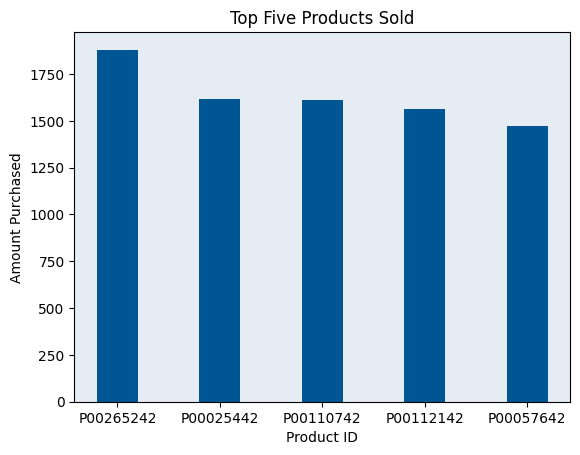

In [1425]:
bar_chart(range(len(top_five_products)), top_five_products['num_sold'],
          top_five_products['product_id'], "Top Five Products Sold", "Product ID",
          "Amount Purchased", format_off = True)

plt.savefig('results/top_five_products_bar.png')

In [1426]:
popular_products_sort['product_category'].value_counts().reset_index()

,product_category,count
0,8,1047
1,5,967
2,1,493
3,11,254
4,2,152
5,6,119
6,7,102
7,16,98
8,3,90
9,4,88


In [1427]:
popular_products_sort

,product_id,num_sold,product_category
0,P00306942,1,11
1,P00309642,1,5
2,P00309042,1,12
3,P00348142,1,5
4,P00308042,1,10
...,...,...,...
3626,P00057642,1470,1
3627,P00112142,1562,1
3628,P00110742,1612,1
3629,P00025442,1615,1


In [1428]:
popular_category = bf_sales['product_category'].value_counts().reset_index()



In [1429]:
popular_category

,product_category,count
0,5,150933
1,1,140378
2,8,113925
3,11,24287
4,2,23864
5,6,20466
6,3,20213
7,4,11753
8,16,9828
9,15,6290


In [1430]:
fem_test = count_occurrences(bf_sales, 'product_category', 'gender', "F")
fem_test


,product_category,count
0,5,41961
1,8,33558
2,1,24831
3,3,6006
4,2,5658
5,11,4739
6,6,4559
7,4,3639
8,16,2402
9,12,1532


In [1431]:
fem_items = bf_sales[bf_sales['gender'] == 'F' ]

fem_items = fem_items[['user_id', 'product_id', 'gender', 'product_category', 
                     'purchase']]
fem_popular_category = fem_items['product_category'].value_counts().reset_index()
fem_popular_category

,product_category,count
0,5,41961
1,8,33558
2,1,24831
3,3,6006
4,2,5658
5,11,4739
6,6,4559
7,4,3639
8,16,2402
9,12,1532


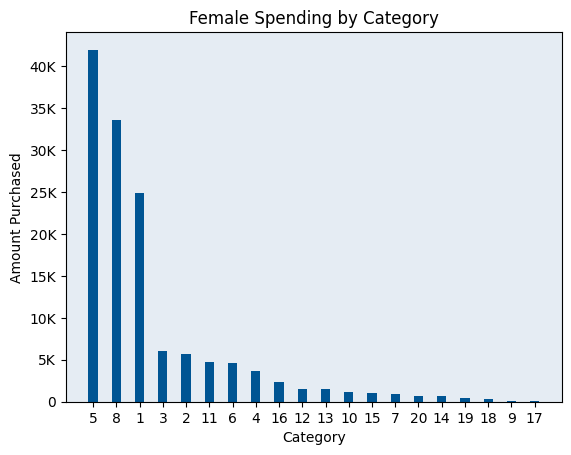

In [1432]:
bar_chart(range(len(fem_popular_category)), fem_popular_category['count'],
          fem_popular_category['product_category'], "Female Spending by Category", "Category", "Amount Purchased")

plt.savefig('results/category_fem_spending_bar.png')

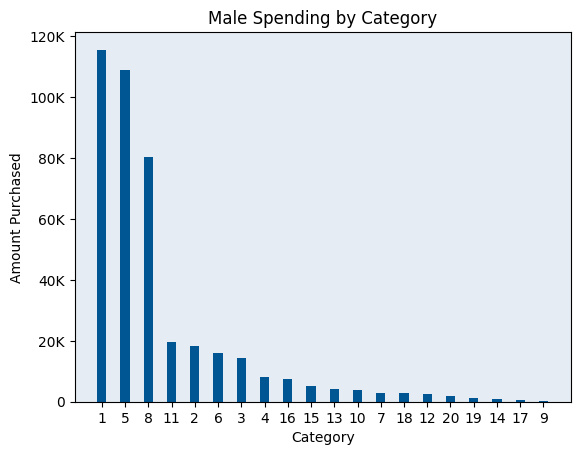

In [1433]:
male_popular_category = count_occurrences(bf_sales, 'product_category', 'gender', "M")

bar_chart(range(len(male_popular_category)), male_popular_category['count'],
          male_popular_category['product_category'], "Male Spending by Category", "Category", "Amount Purchased")

plt.savefig('results/category_male_spending_bar.png')

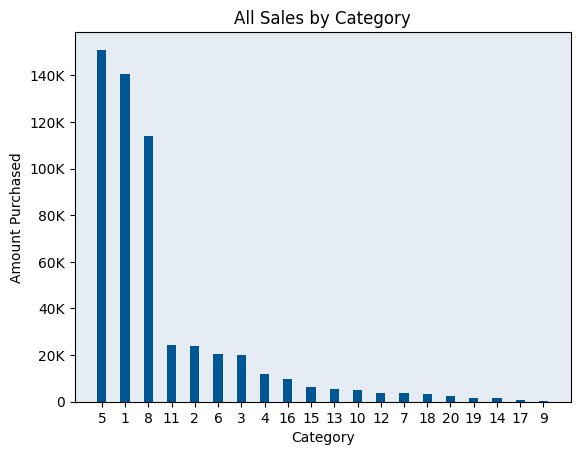

In [1434]:
bar_chart(range(len(popular_category)), popular_category['count'],
          popular_category['product_category'], "All Sales by Category", "Category", "Amount Purchased")

plt.savefig('results/category_sales_bar.png')

In [1435]:
top_five_categories = popular_category.iloc[range(5)]
top_five_categories

,product_category,count
0,5,150933
1,1,140378
2,8,113925
3,11,24287
4,2,23864


In [1436]:
x

range(0, 21)

In [1437]:
range(len(top_five_categories))

range(0, 5)

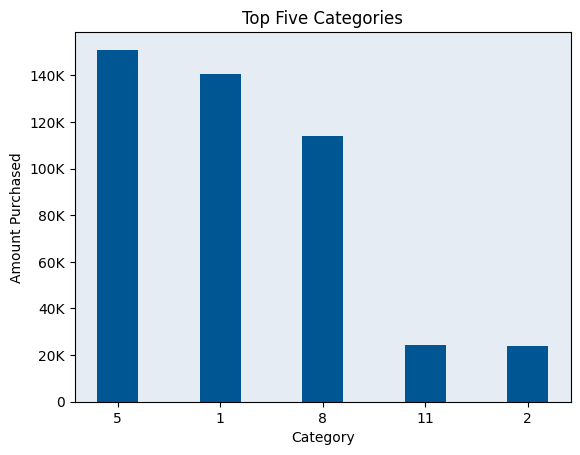

In [1438]:
bar_chart(range(len(top_five_categories)), top_five_categories['count'], top_five_categories['product_category'],
          "Top Five Categories", 'Category', 'Amount Purchased')

plt.savefig('results/category_top_five_bar.png')



In [1439]:
bf_sales

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [1440]:
popular_products_sort['num_sold'].describe()

count   3631.00
mean     151.49
std      212.85
min        1.00
25%       19.50
50%       71.00
75%      194.00
max     1880.00
Name: num_sold, dtype: float64

In [1441]:
user_data_items

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,num_items,purchase
0,1000001,F,0-17,10,A,2,0,35,334093
1,1000002,M,55+,16,C,4+,0,77,810472
2,1000003,M,26-35,15,A,3,0,29,341635
3,1000004,M,46-50,7,B,2,1,14,206468
4,1000005,M,26-35,20,A,1,1,106,821001
...,...,...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0,20,140990
5887,1004871,M,18-25,12,C,2,0,12,108545
5888,1004113,M,36-45,17,C,3,0,20,213550
5889,1005391,M,26-35,7,A,0,0,7,60182


In [1442]:
a = count_occurrences(bf_sales, 'city_category', 'gender', 'F')
a

,city_category,count
0,B,57796
1,C,42309
2,A,35704


In [1443]:
# Boxplots for married males, females, and unmarried males, females.


# marriage = ([(0, 'F'), (1, 'F'), (0, 'M'), (1, 'M')])


marriage = (0, 1)
gender = ('F', 'M')
gender_marriage_sales = []

for m in marriage:
    current_marriage = user_data_items[user_data_items['marital_status'] == m]
    for g in gender:
        current_gender = current_marriage[current_marriage['gender'] == g]
        current_gm = current_gender['purchase'].values
        gender_marriage_sales.append(current_gm)

gender_marriage_sales


[array([ 334093,  379930,  557023, 1979047,  261584,  807983,  248370,
         146840,  200772, 2513618,  316042, 1035584,  124538,  529959,
         294063, 1573914,  867399,  506439, 1138265,  249390,  418019,
         420927,  271183, 1500574,  329084,  686358, 1459135,  319685,
        2253141,  261927,  227705,  129710,  465427,  883230,  175671,
        1188533, 1533999,  135040,  684804,  258950,  639825,  507106,
        1248334,  596211,  771976,  457657,  137272,  932125,  258132,
         128572, 1483498,  195135, 1664154, 1537496,  511248,  184104,
        1059484,  403295,  382811,  365501,  458754,  222709,  327057,
         167098,  130631,  509284,  162635,  217114,  274284,  510684,
         165929, 1039288,  351719, 1211395,  753403, 1371614, 1525678,
        3662030,  975026,  898086, 1042396,  216145,  994853,  252795,
        2439560,  971034,  395559,  705129,  912293,  700407,  181525,
         138586,  137325,  190723,  982182,  533034,  397746, 1416120,
      

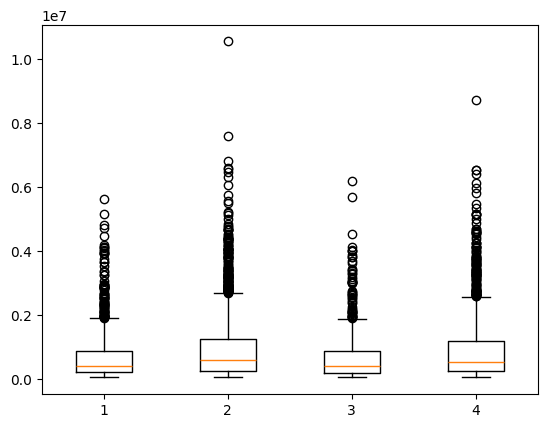

In [1444]:
plt.boxplot(gender_marriage_sales);

In [1445]:


user_data_items[(user_data_items['gender'] == 'M') & (user_data_items['marital_status'] == 0)]


,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,num_items,purchase
1,1000002,M,55+,16,C,4+,0,77,810472
2,1000003,M,26-35,15,A,3,0,29,341635
8,1000009,M,26-35,17,C,0,0,58,594099
11,1000012,M,26-35,12,C,2,0,11,120801
13,1000014,M,36-45,0,C,0,0,13,127629
...,...,...,...,...,...,...,...,...,...
5877,1005608,M,18-25,3,C,1,0,7,61628
5884,1001674,M,36-45,2,C,3,0,16,94838
5887,1004871,M,18-25,12,C,2,0,12,108545
5888,1004113,M,36-45,17,C,3,0,20,213550


In [1446]:
unmarried_male_users = (
    user_data_items[(user_data_items['gender'] == 'M') 
    & (user_data_items['marital_status'] == 0)]
    .groupby('gender')['marital_status']
    .count()
    .reset_index()
)

unmarried_fem_users = (
    user_data_items[(user_data_items['gender'] == 'F') 
    & (user_data_items['marital_status'] == 0)]
    .groupby('gender')['marital_status']
    .count()
    .reset_index()
)

married_male_users = (
    user_data_items[(user_data_items['gender'] == 'M') 
    & (user_data_items['marital_status'] == 1)]
    .groupby('gender')['marital_status']
    .count()
    .reset_index()
)
columns = ['user_id', 'gender', 'marital_status', 'purchase']
married_fem_users = (
    user_data_items.loc[(user_data_items['gender'] == 'F') 
    & (user_data_items['marital_status'] == 1)]
    .groupby('gender')['marital_status']
    .count()
    .reset_index()
)

married_fem_users
married_male_users

,gender,marital_status
0,M,1755


In [1447]:
unmarried_male_users_df = (
    user_data_items[(user_data_items['gender'] == 'M') 
    & (user_data_items['marital_status'] == 0)]
    .groupby(['gender', 'marital_status'])
    .size()
    .reset_index(name='count')
)

unmarried_fem_users_df = (
    user_data_items[(user_data_items['gender'] == 'F') 
    & (user_data_items['marital_status'] == 0)]
    .groupby(['gender', 'marital_status'])
    .size()
    .reset_index(name='count')
)


married_male_users_df = (
    user_data_items[(user_data_items['gender'] == 'M') 
    & (user_data_items['marital_status'] == 1)]
    .groupby(['gender', 'marital_status'])
    .size()
    .reset_index(name='count')
)

married_fem_users_df = (
    user_data_items.loc[(user_data_items['gender'] == 'F') 
    & (user_data_items['marital_status'] == 1)]
    .groupby(['gender', 'marital_status'])
    .size()
    .reset_index(name='count')
)


married_male_users_df

,gender,marital_status,count
0,M,1,1755


In [1448]:
marriage_gen_users_dfs = pd.concat([married_fem_users_df, unmarried_fem_users_df,
                                married_male_users_df, unmarried_male_users_df])

marriage_gen_users_dfs['gender'].replace({'F': 'Female'}, inplace=True)
marriage_gen_users_dfs['gender'].replace({'M': 'Male'}, inplace=True)

marriage_gen_users_dfs['marital_status'].replace({0: 'Unmarried'}, inplace=True)
marriage_gen_users_dfs['marital_status'].replace({1 : 'Married'}, inplace=True)

marriage_gen_users_dfs = (
    marriage_gen_users_dfs.sort_values(by='marital_status')
)

marriage_gen_users_dfs['label'] = (
    marriage_gen_users_dfs['marital_status'] + ' '
      + marriage_gen_users_dfs['gender'].astype(str)
)

marriage_gen_users_dfs 

,gender,marital_status,count,label
0,Female,Married,719,Married Female
0,Male,Married,1755,Married Male
0,Female,Unmarried,947,Unmarried Female
0,Male,Unmarried,2470,Unmarried Male


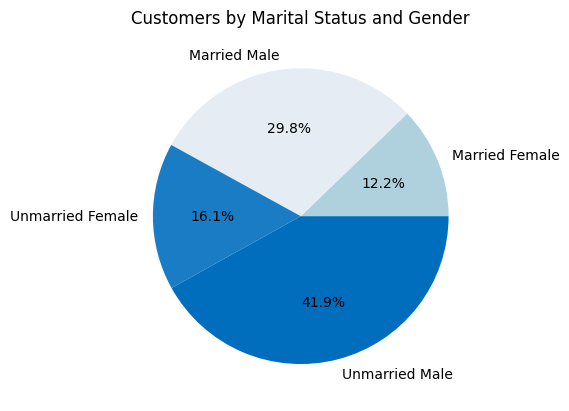

In [1449]:
plt.pie(marriage_gen_users_dfs['count'], labels=marriage_gen_users_dfs['label'],
        autopct='%1.1f%%',
        colors=(kcblue3lite, kcbgcolor, '#1a7cc4', kcblue2 ));

plt.title('Customers by Marital Status and Gender') 

plt.savefig('results/marital_gender_users_pie.png')

In [1450]:
bf_sales[bf_sales['marital_status'] == 0 ].count()

user_id                       324731
product_id                    324731
gender                        324731
age                           324731
occupation                    324731
city_category                 324731
stay_in_current_city_years    324731
marital_status                324731
product_category              324731
purchase                      324731
dtype: int64

In [1451]:
bf_sales[bf_sales['marital_status'] == 1 ].count()

user_id                       225337
product_id                    225337
gender                        225337
age                           225337
occupation                    225337
city_category                 225337
stay_in_current_city_years    225337
marital_status                225337
product_category              225337
purchase                      225337
dtype: int64

In [1452]:
marriage_gen_users_dfs.sort_values(by='gender')

,gender,marital_status,count,label
0,Female,Married,719,Married Female
0,Female,Unmarried,947,Unmarried Female
0,Male,Married,1755,Married Male
0,Male,Unmarried,2470,Unmarried Male


In [1453]:
unmarried_male_sales = (
    user_data_items[(user_data_items['gender'] == 'M') 
    & (user_data_items['marital_status'] == 0)]
    .groupby(['gender', 'marital_status'])['purchase']
    .sum()
)
unmarried_male_sales_df = unmarried_male_sales.reset_index()


unmarried_fem_sales = (
    user_data_items[(user_data_items['gender'] == 'F') 
    & (user_data_items['marital_status'] == 0)]
    .groupby(['gender', 'marital_status'])['purchase']
    .sum()
)
unmarried_fem_sales_df = unmarried_fem_sales.reset_index()


married_male_sales = (
    user_data_items[(user_data_items['gender'] == 'M') 
    & (user_data_items['marital_status'] == 1)]
    .groupby(['gender', 'marital_status'])['purchase']
    .sum()
)
married_male_sales_df = married_male_sales.reset_index()

columns = ['user_id', 'gender', 'marital_status', 'purchase']
married_fem_sales = (
    user_data_items.loc[(user_data_items['gender'] == 'F') 
    & (user_data_items['marital_status'] == 1)]
    .groupby(['gender', 'marital_status'])['purchase']
    .sum()
)

married_fem_sales = married_fem_sales.reset_index()

unmarried_fem_sales_df

,gender,marital_status,purchase
0,F,0,684154127


In [1454]:
marriage_gen_sales_dfs = pd.concat([married_fem_sales, unmarried_fem_sales_df,
                                married_male_sales_df, unmarried_male_sales_df])

marriage_gen_sales_dfs

,gender,marital_status,purchase
0,F,1,502078515
0,F,0,684154127
0,M,1,1584806780
0,M,0,2324773320


In [1455]:
marriage_gen_sales_dfs['gender'].replace({'F': 'Female'}, inplace=True)
marriage_gen_sales_dfs['gender'].replace({'M': 'Male'}, inplace=True)

marriage_gen_sales_dfs['marital_status'].replace({0: 'Unmarried'}, inplace=True)
marriage_gen_sales_dfs['marital_status'].replace({1 : 'Married'}, inplace=True)

marriage_gen_sales_dfs


,gender,marital_status,purchase
0,Female,Married,502078515
0,Female,Unmarried,684154127
0,Male,Married,1584806780
0,Male,Unmarried,2324773320


In [1456]:
# married_gen_sales_dataframes['label'] = married_gen_sales_dataframes['marital_status'] + ' ' + married_gen_sales_dataframes['gender'] .astype(str)
marriage_gen_sales_dfs['label'] = marriage_gen_sales_dfs['marital_status'] + ' ' + marriage_gen_sales_dfs['gender'].astype(str)
# kc_pie_chart(married_gen_sales_dataframes['purchase'],

marriage_gen_sales_dfs = marriage_gen_sales_dfs.sort_values(by='marital_status')

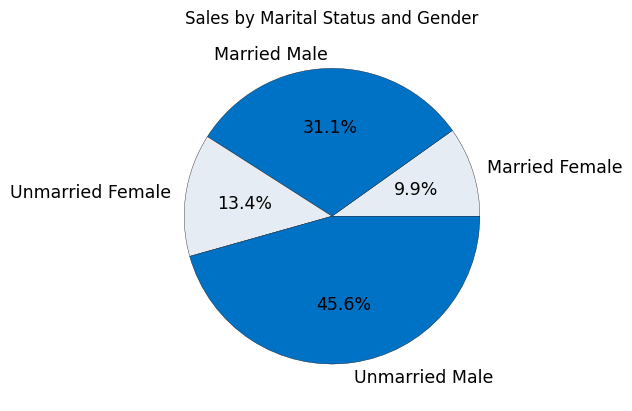

In [1457]:
kc_pie_chart(marriage_gen_sales_dfs['purchase'], marriage_gen_sales_dfs['label'],
             "Sales by Marital Status and Gender")


# def kc

Text(0.5, 1.0, 'Sales by Marital Status and Gender')

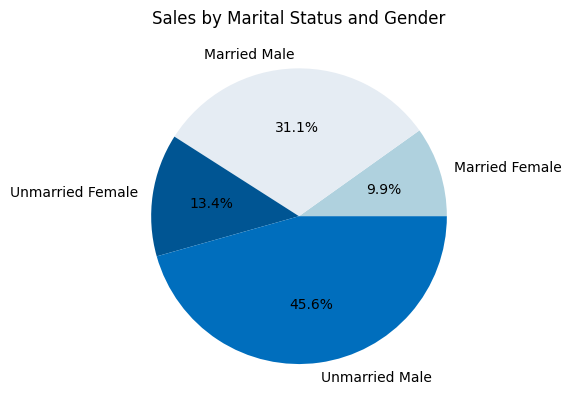

In [1458]:
plt.pie(marriage_gen_sales_dfs['purchase'], labels=marriage_gen_sales_dfs['label'],
        autopct='%1.1f%%',
        colors=(kcblue3lite, kcbgcolor, kcblue, kcblue2 ));

plt.title('Sales by Marital Status and Gender')

Text(0.5, 1.0, 'Sales by Marital Status and Gender')

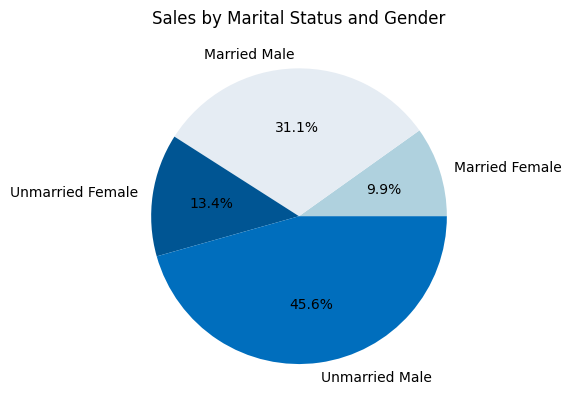

In [1459]:
plt.pie(marriage_gen_sales_dfs['purchase'], labels=marriage_gen_sales_dfs['label'],
        autopct='%1.1f%%',
        colors=(kcblue3lite, kcbgcolor, kcblue, kcblue2 ));

plt.title('Sales by Marital Status and Gender')

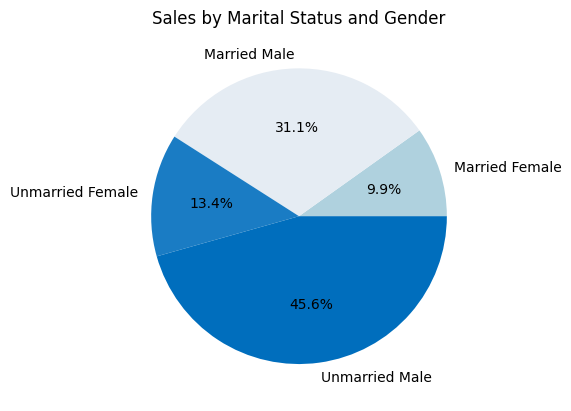

In [1460]:
plt.pie(marriage_gen_sales_dfs['purchase'], labels=marriage_gen_sales_dfs['label'],
        autopct='%1.1f%%',
        colors=(kcblue3lite, kcbgcolor, '#1a7cc4', kcblue2 ));

plt.title('Sales by Marital Status and Gender') 
plt.savefig('results/marital_gender_sales_pie.png')

In [1461]:
marriage_gen_users_dfs['count'].sum()

5891

In [1462]:
marriage_gen_users_dfs


,gender,marital_status,count,label
0,Female,Married,719,Married Female
0,Male,Married,1755,Married Male
0,Female,Unmarried,947,Unmarried Female
0,Male,Unmarried,2470,Unmarried Male


In [1463]:
marriage_gen_sales_dfs['purchase'].sum()

5095812742

In [1464]:
marriage_gen_sales_dfs

,gender,marital_status,purchase,label
0,Female,Married,502078515,Married Female
0,Male,Married,1584806780,Married Male
0,Female,Unmarried,684154127,Unmarried Female
0,Male,Unmarried,2324773320,Unmarried Male


In [1465]:
item_data

,product_id,product_category
0,P00069042,3
1,P00248942,1
2,P00087842,12
3,P00085442,12
4,P00285442,8
...,...,...
3626,P00375436,20
3627,P00372445,20
3628,P00370293,19
3629,P00371644,20


In [1466]:
bf_sales[bf_sales['product_id'] == 'P00265242']

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
399,1000066,P00265242,M,26-35,18,C,2,0,5,8652
1191,1000196,P00265242,F,36-45,9,C,4+,0,5,8767
1372,1000222,P00265242,M,26-35,1,A,1,0,5,6944
1845,1000301,P00265242,M,18-25,4,B,4+,0,5,8628
2209,1000345,P00265242,M,26-35,12,A,2,1,5,8593
...,...,...,...,...,...,...,...,...,...,...
543413,1005667,P00265242,M,36-45,7,B,1,1,5,8874
544366,1005797,P00265242,M,26-35,7,A,4+,1,5,8880
544629,1005837,P00265242,M,26-35,7,B,0,1,5,8641
544834,1005872,P00265242,M,26-35,17,C,1,1,5,8762
